<a href="https://colab.research.google.com/github/paulmachau/-project-1/blob/main/Movie__gross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing csv file
import pandas as pd

df = pd.read_csv('bom.movie_gross.csv')


In [5]:
#print the first 10 rows of the data set
df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [6]:
# Check for null or missing values
print(df.isnull().sum())

# Drop rows with any missing values
df.dropna(inplace=True)

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


The code first checks for null or missing values in the DataFrame df using the .isnull() method, which returns a boolean DataFrame where True represents missing values. The .sum() method is then used to count the number of missing values for each column.

In [7]:
# Drop rows with any missing values
df.dropna(inplace=True)
# Check for null or missing values
print(df.isnull().sum())


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


To remove the rows with missing values from the DataFrame, you can use the .dropna() method with inplace=True parameter. Then run the null() fuction to see if there any missing values as we can see there aren't any.

In [8]:
# Check shape of DataFrame before and after dropping missing values
print("Before dropping missing values: ", df.shape)
df.dropna(inplace=True)
print("After dropping missing values: ", df.shape)

Before dropping missing values:  (2007, 5)
After dropping missing values:  (2007, 5)


The code checks the shape of the DataFrame before and after dropping missing values using the .shape attribute of the DataFrame.
The output of this code will print the number of rows and columns in the DataFrame before and after dropping missing values.

It's important to note that the .dropna() method with inplace=True parameter modifies the original DataFrame, with caution and check that it aligns with your analysis goals.


In [9]:
# Drop duplicate rows based on specific columns
df.drop_duplicates(subset=['title', 'year'], inplace=True)
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
# Check for duplicates
print(df.duplicated().sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)

0


In [11]:
# Check data types
print(df.dtypes)

# Convert a column to a different data type
df['title'] = df['year'].astype('int')

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


After cheking the data type the result shows that the foreign_gross is recognised as an object yet the values are float values so we have to change that into  float variable.

In [12]:
# Convert 'foreign_gross' column to float64 data type
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

The code  converts the "foreign_gross" column in the DataFrame to the float64 data type using the pd.to_numeric() method with the errors='coerce' parameter.

The pd.to_numeric() method converts a column to a numeric data type. The errors='coerce' parameter tells the method to convert any non-numeric values to NaN (Not a Number) instead of raising an error. This is useful for columns that may contain non-numeric values or missing values that need to be handled.



In [13]:
# Check data types
print(df.dtypes)

# Convert a column to a different data type
df['title'] = df['year'].astype('int')

title               int64
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object


             title  domestic_gross  foreign_gross         year
count  2007.000000    2.007000e+03   2.002000e+03  2007.000000
mean   2013.506228    4.701984e+07   7.597967e+07  2013.506228
std       2.597997    8.162689e+07   1.383001e+08     2.597997
min    2010.000000    4.000000e+02   6.000000e+02  2010.000000
25%    2011.000000    6.700000e+05   4.000000e+06  2011.000000
50%    2013.000000    1.670000e+07   1.960000e+07  2013.000000
75%    2016.000000    5.605000e+07   7.645000e+07  2016.000000
max    2018.000000    9.367000e+08   9.605000e+08  2018.000000


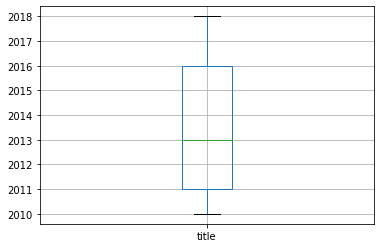

In [14]:
# Check summary statistics
print(df.describe())

# Create a boxplot of a column to visualize outliers
df.boxplot(column='title')

# Calculate the interquartile range (IQR)
Q1 = df['title'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['title'] > lower_threshold) & (df['year'] < upper_threshold)]

The df.describe() method is used to check the summary statistics of the DataFrame after the modifications made earlier. This provides a quick overview of the central tendency, spread, and distribution of the numerical columns in the DataFrame.

The df.boxplot(column='title') method creates a boxplot of the "title" column to visualize any outliers. Boxplots are a useful tool for visualizing the distribution of data and identifying potential outliers. Outliers are data points that are significantly different from the majority of the data points and can have a significant impact on statistical analyses.

The code then calculates the interquartile range (IQR) for the "title" column using the .quantile() method. The IQR is used to define the upper and lower bounds for outliers.

The lower and upper bounds are defined as lower_threshold = Q1 - 1.5 * IQR and upper_threshold = Q3 + 1.5 * IQR, respectively. Any data points outside of these bounds are considered outliers and are removed from the DataFrame using boolean indexing.

It's important to note that the code modifies the original DataFrame, so make sure to use it with caution and consider creating a copy of the DataFrame if you want to keep the original intact.





